In [2]:
import pyproj
from pyproj import Geod

In [3]:
# WGS84椭球体
g = Geod(ellps='WGS84')

In [4]:
def boundary(lat, lon, d, g):
    """
    给定目标点经纬度坐标，和目标到影像中心点最远距离，
    返回值，南北的纬度，东西的经度
    """
    new_lon, new_lat, az = g.fwd(lon, lat, 0, d)
    dlat = new_lat - lat
    # print(f'new_lon={new_lon}, new_lat={new_lat}, da={dlat}')
    new_lon, new_lat, az = g.fwd(lon, lat, 90, d)
    dlon = new_lon - lon
    # print(f'new_lon={new_lon}, new_lat={new_lat}, do={dlon}')

    nlat = lat + dlat
    slat = lat - dlat
    elon = lon + dlon
    wlon = lon - dlon

    print(f"dlat={dlat}, dlon={dlon}")

    return nlat, slat, elon, wlon

def test_boundary():
    # WGS84椭球体
    g = Geod(ellps='WGS84')
    d = 115 * 1000 # 5.5 * 1000 # 7.7*1000
    for lat in range(-90, 90, 30):
        for lon in range(-180, 180, 60):
            nlat, slat, elon, wlon = boundary(lat, lon, d, g)
            print(f"nlat={nlat}, slat={slat}, elon={elon}, wlon={wlon}")

# test_boundary()
g = Geod(ellps='WGS84')
d = 115 * 1000 # 5.5 * 1000 # 7.7*1000
print(boundary(0, 179, d, g))
print(boundary(0, -180, d, g))
print(boundary(90, 0, d, g))
print(boundary(-90, 0, d, g))

dlat=1.0400237516777822, dlon=-358.96693742326255
(1.0400237516777822, -1.0400237516777822, -179.96693742326255, 537.9669374232626)
dlat=1.0400237516777822, dlon=1.03306257673745
(1.0400237516777822, -1.0400237516777822, -178.96693742326255, -181.03306257673745)
dlat=-1.0296000337992979, dlon=90.0
(88.9703999662007, 91.0296000337993, 90.0, -90.0)
dlat=1.0296000337992979, dlon=90.0
(-88.9703999662007, -91.0296000337993, 90.0, -90.0)


In [5]:
def dlon_at_lat(lat, d, g):
    """
    纬度lat处，大地距离d，对应的经度变化
    不同纬度上，距离d对应的经度变化不同
    """
    new_lon, new_lat, az = g.fwd(0, lat, 90, d)
    dlon = new_lon - 0
    return dlon

def dlat_at_lat(lat, d ,g):
    """
    大地距离d对应的纬度变化
    经线是测地线，距离d对应的纬度即变化纬度
    """
    new_lon, new_lat, az = g.fwd(0, 0, 0, d)
    dlat = new_lat - 0
    return dlat

d = 7.5 * 1000
dlat_polor = dlat_at_lat(0, d, g)
print(dlat_polor)

0.06782771046061067


In [6]:
d = 15.5 * 1000 # 5.5 * 1000 # 7.7*1000
g = Geod(ellps='WGS84')
lat_beg, lat_end = -90, 89
for lat in [lat_beg, lat_end]:
    print(dlon_at_lat(lat, d, g))

90.0
7.901012968231893


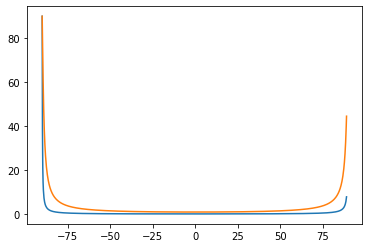

In [7]:
import matplotlib.pyplot as plt
dlat = (lat_end - lat_beg)*0.001
for d in [15.5 * 1000, 110 * 1000] :
    x = [lat_beg + i * dlat for i in range(1001)]
    y = [dlon_at_lat(lat, d , g) for lat in x]
    plt.plot(x,y)

In [8]:
360*180

64800